# EDA on raw data to understand the dataset, and uncover patterns before using the processed data for modelling

We can safely use the raw data as we checked there are no outliers in the data cleaning and preprocessing notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_theme()

file_path = r"..\data\processed\cleaned-telco-customer-churn.csv"
df = pd.read_csv(file_path)


### Numerical Features

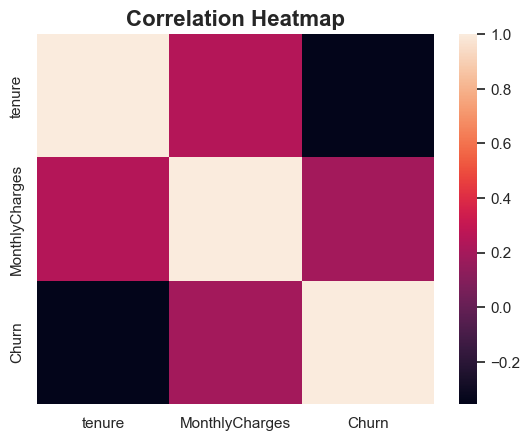

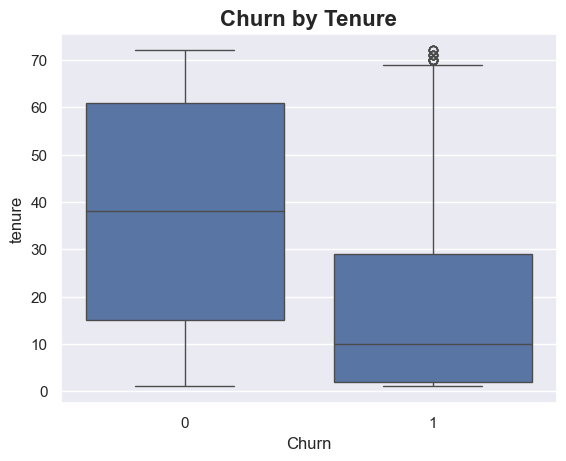

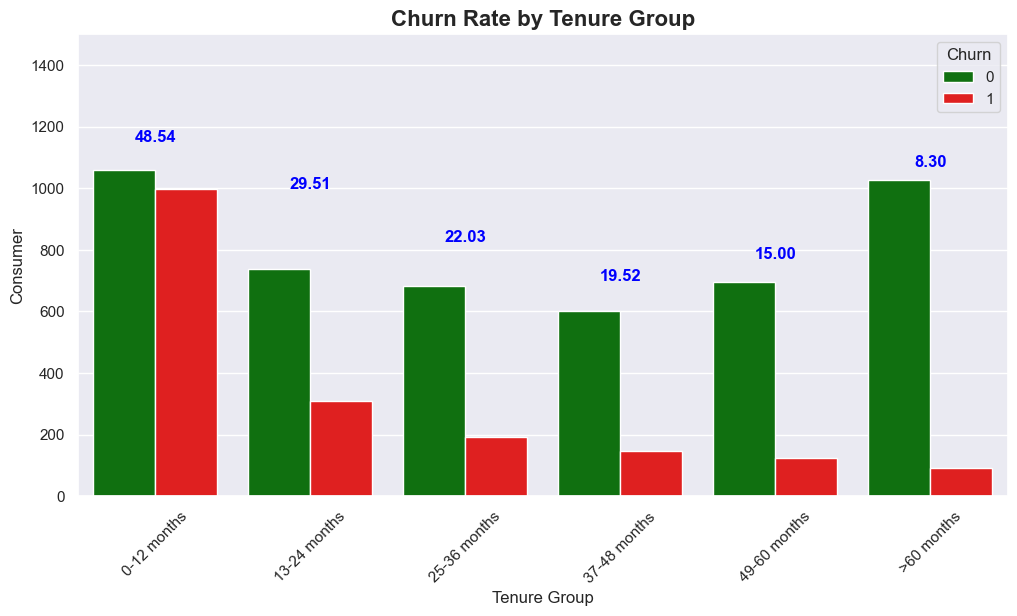

In [26]:
# Correlations 

numerical_features = ["tenure", "MonthlyCharges", "Churn"]
# numerical data frame
df_numerical = df[numerical_features]

# correlation heatmap
corr_matrix = df_numerical.corr(numeric_only=True)
sns.heatmap(corr_matrix)
plt.title("Correlation Heatmap", fontsize=16, fontweight="bold")
plt.show()

# box plot 
sns.boxplot(x="Churn", y="tenure", data=df_numerical)
plt.title("Churn by Tenure", fontsize=16, fontweight="bold")
plt.show()


# bar chart
# create bins of size 12 for tenure
bins = [0, 12, 24, 36, 48, 60, df['tenure'].max()]
labels = ['0-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '>60 months']

# create a new column for grouped tenure
df_numerical["tenure_group"] = pd.cut(df["tenure"], bins=bins, labels=labels, right=False)

# calculate churn rates for each tenure group 
churn_rates = (
    df_numerical.groupby("tenure_group")["Churn"]
    .agg(total_customers="size", churned_customers="sum") # get size of total rows, and then sum the churned customers
    .reset_index()
)
churn_rates["churn_rate"] = churn_rates["churned_customers"]  / churn_rates["total_customers"] * 100 # new column of churn rates

# visualisation
# initalise figure
plt.figure(figsize=(12,6))
ax = sns.countplot(x="tenure_group", hue="Churn", data=df_numerical, palette=["green", "red"])

# add churn rate to the figure
for i, tenure_group in enumerate(churn_rates["tenure_group"]):
    # total customers and churn rate for current group
    total_customers = churn_rates.loc[churn_rates["tenure_group"] == tenure_group, "total_customers"].values[0]
    churn_rate = churn_rates.loc[churn_rates["tenure_group"] == tenure_group, "churn_rate"].values[0]

    # position churn rate 
    ax.text(
        i,
        min(total_customers, 1200) - 50,
        f"{churn_rate:.2f}",
        ha="center",
        fontsize=12,
        fontweight="bold",
        color="blue"
    )


plt.xlabel("Tenure Group")
plt.ylabel("Consumer")
plt.title("Churn Rate by Tenure Group", fontsize=16, fontweight="bold")
plt.ylim(0,1500)
plt.xticks(rotation=45)
plt.show()

1) Tenure and monthly charge has a correlation of 0.247 -> weak positive correlation, **suggesting customers with longer tenures tend to have slightly higher monthly charges**


2) Tenure and churn has a correlation of -0.354 -> moderate negative correlation, **suggesting customers with longer tenures are less likely to churn**
<br><br>*Exploring this correlation w/ 2 other graphs*<br><br>
    From the box plot:
    - Customers who did not churn have a wider range of tenures, with a median about 40 months. The IQR is broad, so many customers stayed for extended periods as tenure values are spread accross a long period.
    - Customers who churned have a lower median tenure, around 10 months. IQR is smaller so customers who churn will do so quickly. There are some outliers who have longer tenures but still churned, suggesitng long-term customers could be leaving due to other factors 

    From the count plot:
    - Churn rate decreases as tenure increases 

    Therefore, we can conclude, in general, **customers with longer tenures are less likely to churn**
<br>

3) Monthly charge and churn has a correlation of 0.193 -> weak positive correlation, **suggesting customers with higher monthly charges are slightly more likely to churn**